# SOUP 2024 Exercise set 1: Hypothesis testing, Goodness of Fit

Welcome to the SOUP exercise set! 

#### Prerequisite: installation instructions

To make sure you can take part in the exercises during the hands-on session on Statistics, you should ensure before coming to SoUP that you have a computer that can run python 3.6 or newer, with the modules numpy, scipy, matplotlib, and that you are able to run “jupyter notebooks”.
If you are not familiar with these tools already, we recommend this walkthrough on how to install the necessary software:
https://python-for-scientists.readthedocs.io/en/latest/_pages/install_python.html

The short version:
1) Install python with miniconda from the website: https://docs.anaconda.com/miniconda/
2) If you’re using windows, use the Anaconda Prompt application, otherwise open your command line.
3) Install the required packages by typing and running (press enter) "conda install numpy scipy matplotlib notebook”
4) open a “jupyter notebook” by typing and running “jupyter notebook” and following the instructions to open a localhost “website".
5) You should now be able to open the SOUP24_exercise1.ipynb document

In case of problems, contact Knut Dundas Morå at fysikk at dundasmora dot no 

In [1]:
# Import modules with the tools we need: 
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np

## 0: Getting Started

The aim of this section is to make sure that you will have the tools you need for the rest
of the course- make sure to play around with the examples you see below before moving on.

#### Numpy vectors

Numpys array format is the first step towards eﬃcient computation with python.
Here are some examples of useful functions: 

In [2]:
a = np.array([2,3,4])
print("a:",a)
b = np.linspace(0,1.,3)
print("b:", b)
c = np.zeros(3)
print("c:",c)
d = a+b
print("d:",d)
print("d^2:",d**2)

a: [2 3 4]
b: [0.  0.5 1. ]
c: [0. 0. 0.]
d: [2.  3.5 5. ]
d^2: [ 4.   12.25 25.  ]



#### Use vectors whenever possible
Modern computers are very efficient at performing parallel operations, and much of numpy/scipy allows you to perform operations on an entire vector at once. As an example, these cells both generate N random numbers, but on my computer the loop is 6000 times slower!

In [3]:
N = 10000

In [4]:
%%timeit 
ret = sps.norm().rvs(N)

344 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
%%timeit
ret = np.zeros(N)
for i in range(N):
    ret[i] = sps.norm().rvs()

2.16 s ± 22.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Built-in distributions: 
Pseudorandom numbers generated according to some statistical distribution are crucial in
many computations. Using scipy.stats, you find a large number of ready-made functions:
http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html. The exam-
ple below shows how you may generate some random numbers from a gaussian distribution by
creating an object r with a normal distribution:

In [6]:
mu=10
sigma = 5
r = sps.norm(mu,sigma)
print("the mean of r is: ", r.mean())
print("the variance of r is: ", r.var()) #variance
print("a random number from r:",r.rvs()) #one random number
print("ten random numbers from r:", r.rvs(10)) #array with 10 random numbers

the mean of r is:  10.0
the variance of r is:  25.0
a random number from r: 15.537341775268853
ten random numbers from r: [ 6.13915539 15.97631979 12.92013752  4.51989384  7.71398022 11.27547151
 11.4963252  13.71928965  0.27513797 10.65157009]


#### Plotting
Matplotlib contains a plethora of plotting functions. If you are looking for the correct
function, enter http://matplotlib.org/gallery.html, and pick the one you like.

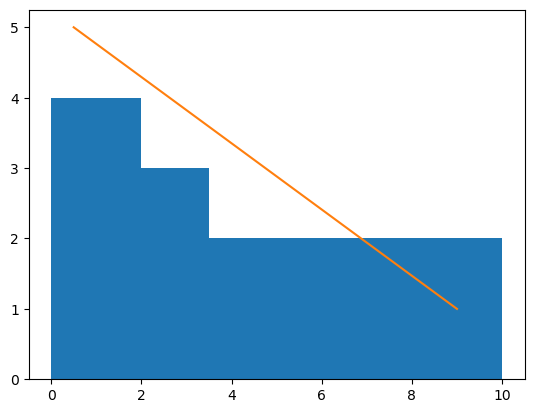

the histogram function gives you binned counts (+bin edges and the plot) as a return:  (array([4., 3., 2.]), array([ 0. ,  2. ,  3.5, 10. ]), <BarContainer object of 3 artists>)


In [7]:
data = [1,1,2,1,5,3,0.7,3,5] 
bins = [0,2,3.5,10] #edges of the bins
plt.clf()
ret = plt.hist(data, bins=bins)
plt.plot([0.5,9],[5,1])
plt.show()
print("the histogram function gives you binned counts (+bin edges and the plot) as a return: ", ret)

## 1: The Central Limit Theorem

Try out generating and plotting the distribution of the sum of N random numbers. Can you show them approaching a Gaussian? Is there anything you can do to make it not do so?

[-0.97590007  0.         -0.48795004 ...  0.48795004  0.
  1.46385011]


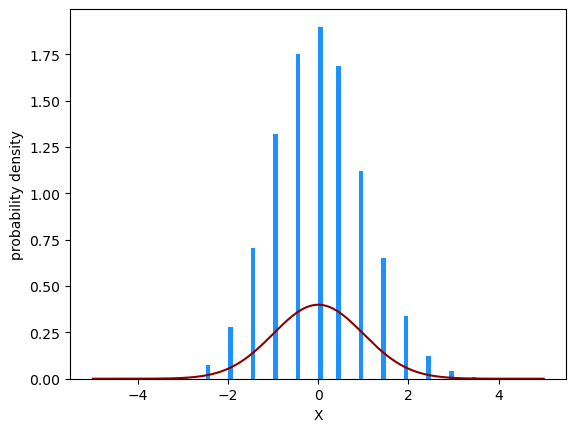

How gaussian this looks to you depends on the binning-- all our results are integers. 


In [8]:
#I will use the binomial distribution since it is rather non-gaussian on its face. 
n_summands = 10
n_toys = 10000
distribution = sps.binom(2,0.3) #binomial distribution -- this object has all the methods we need 

toydata = distribution.rvs((n_summands,n_toys)) #scipy.stats conveniently allows me to generate all the numbers in one go
toydata = np.sum(toydata, axis=0) #sum all n_summands and make a 1-d array 
toydata = toydata.astype(float) #python complains if we subtract floats from ints
toydata -= n_summands * distribution.mean() #subtract the mean
toydata /= np.sqrt(n_summands * distribution.var()) #and divide away the variance. 
print(toydata)

plt.clf()
plt.hist(toydata, density=True, color="dodgerblue", bins=np.linspace(-5,5,101)) #density=True scales the distribution to accord to a gaussian
x = np.linspace(-5,5,1000)
plt.plot(x,sps.norm().pdf(x), color="darkred")
plt.xlabel("X")
plt.ylabel("probability density")
plt.show()

print("How gaussian this looks to you depends on the binning-- all our results are integers. ")

#### Try another distribution too-- exponential

[ 0.81675529  0.72850038  0.48875131 ...  1.79788651  0.84562374
 -0.78623225]


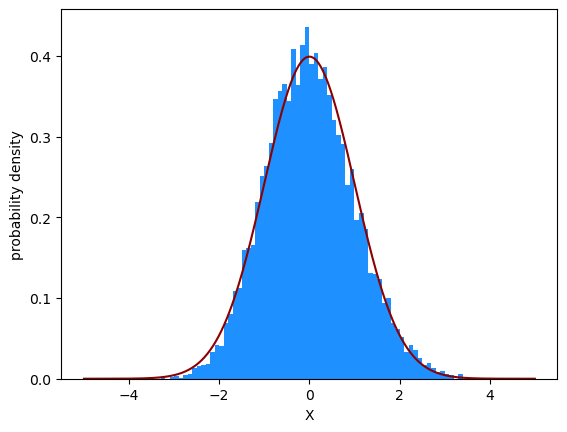

There is certainly a skew here with n_summands = 10, and if you squint you can see it at n_summands=100 


In [9]:
#I will use the binomial distribution since it is rather non-gaussian on its face. 
n_summands = 100
n_toys = 10000
distribution = sps.expon() #exponential distribution-- it is very asymmetrical

toydata = distribution.rvs((n_summands,n_toys)) #scipy.stats conveniently allows me to generate all the numbers in one go
toydata = np.sum(toydata, axis=0) #sum all n_summands and make a 1-d array 
toydata = toydata.astype(float) #python complains if we subtract floats from ints
toydata -= n_summands * distribution.mean() #subtract the mean
toydata /= np.sqrt(n_summands * distribution.var()) #and divide away the variance. 
print(toydata)

plt.clf()
plt.hist(toydata, density=True, color="dodgerblue", bins=np.linspace(-5,5,101)) #density=True scales the distribution to accord to a gaussian
x = np.linspace(-5,5,1000)
plt.plot(x,sps.norm().pdf(x), color="darkred")
plt.xlabel("X")
plt.ylabel("probability density")
plt.show()

print("There is certainly a skew here with n_summands = 10, and if you squint you can see it at n_summands=100 ")

## 2: Goodness-of-fit

Now consider the problem of checking if this sum _is_ Gaussian. Generate M random sums of N random numbers, and try out some goodness-of-fit tests such as: 
- the Kolmogorov-Smirnov
- Anderson-Darling
- Chi-square
- (Bonus: if you choose the distribution of each of the N summands, can you compute an analytical distribution of the sum so that you can use the likelihood ratio?)

#### I'll work with the exponential since I like the rakish asymmetry

(1000,)


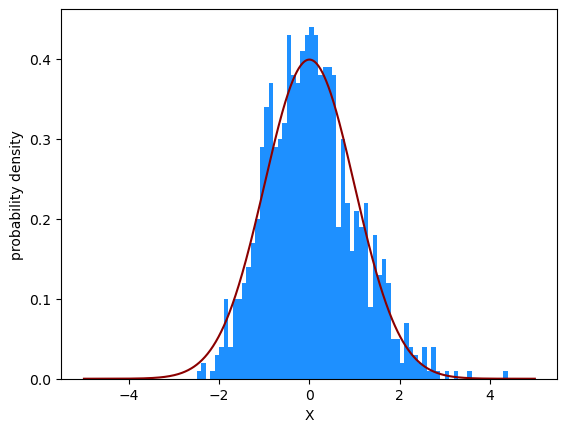

In [10]:
n_summands = 20 #number of random variables to be summed
n_samples = 1000 #number of these sums that will make up a datase to be tested for gaussianity
n_toy_samples = 10000 #number of times we'll run the experiment
distribution = sps.expon() #exponential distribution-- it is very asymmetrical

#I do some clever generation so I can access each dataset in turn
toydata = distribution.rvs((n_summands,n_toy_samples, n_samples)) #scipy.stats conveniently allows me to generate all the numbers in one go
toydata = toydata.sum(axis=0) #sum n_summands

toydata = toydata.astype(float) #python complains if we subtract floats from ints
toydata -= n_summands * distribution.mean() #subtract the mean
toydata /= np.sqrt(n_summands * distribution.var()) #and divide away the variance. 

#now my first dataset is toydata[0] etc
print(toydata[0].shape)

plt.clf()
plt.hist(toydata[0], density=True, color="dodgerblue", bins=np.linspace(-5,5,101)) #density=True scales the distribution to accord to a gaussian
x = np.linspace(-5,5,1000)
plt.plot(x,sps.norm().pdf(x), color="darkred")
plt.xlabel("X")
plt.ylabel("probability density")
plt.show()

#### Try out the KS test: 

In [11]:
print(sps.kstest(toydata[4], "norm")) #for me, these p-values are quite good-- it seems the KS test is having trouble distinguishing this from a gaussian

pvalues_ks = np.zeros(len(toydata))
for i in range(len(toydata)):
    pvalues_ks[i] = sps.kstest(toydata[i], "norm").pvalue

KstestResult(statistic=0.055529127518775034, pvalue=0.004031035111922534)


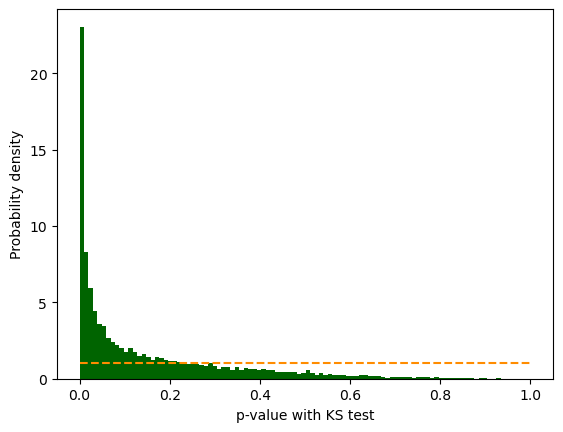

While we see that many p-values are good, the distribution is peaked at p=0-- so we have _some_ power!
If you increase the number of samples, or decrease the number of summands, you'll see a distribution that peaks more and more left


In [12]:
plt.clf()
plt.hist(pvalues_ks, bins=100, color="darkgreen", density=True)
plt.plot([0,1],[1,1], linestyle="--", color="darkorange")
plt.xlabel("p-value with KS test")
plt.ylabel("Probability density")
plt.show()
print("While we see that many p-values are good, the distribution is peaked at p=0-- so we have _some_ power!")
print("If you increase the number of samples, or decrease the number of summands, you'll see a distribution that peaks more and more left")

### Try out a Chi2-test
Since we cannot trust that our X2 will be Chi2 distributed, we'll instead compare two toyMCs for now. 

In [13]:

n_summands = 20 #number of random variables to be summed
n_samples = 1000 #number of these sums that will make up a datase to be tested for gaussianity
n_toy_samples = 10000 #number of times we'll run the experiment
distribution = sps.expon() #exponential distribution-- it is very asymmetrical
distribution_null = sps.norm() #reference distribution

#I do some clever generation so I can access each dataset in turn
toydata = distribution.rvs((n_summands,n_toy_samples, n_samples)) #scipy.stats conveniently allows me to generate all the numbers in one go
toydata_null = distribution_null.rvs((n_toy_samples, n_samples))
toydata = toydata.sum(axis=0) #sum n_summands

toydata = toydata.astype(float) #python complains if we subtract floats from ints
toydata -= n_summands * distribution.mean() #subtract the mean
toydata /= np.sqrt(n_summands * distribution.var()) #and divide away the variance. 

In [14]:
bins = np.linspace(-3,3,int(n_samples/5.)) #choose some binning that does not have _too_ few bins. 
mu_gaussian = n_samples*(sps.norm().cdf(bins[1::]) - sps.norm().cdf(bins[0:-1])) #compute the expectation value in each bin-- a fast way is to use cumulative

def sample_x2(toy_sample):
    n_counts, _ = np.histogram(toy_sample, bins=bins) #bin the sample data in the chosen binning
    return np.sum( (n_counts-mu_gaussian)**2 / mu_gaussian ) #the chi2 using a gaussian approximation to the poisson

In [15]:
x2_for_null = np.zeros(n_toy_samples)
x2_for_sum  = np.zeros(n_toy_samples)

for i in range(n_toy_samples):
    x2_for_null[i] = sample_x2(toydata_null[i])
    x2_for_sum[i] = sample_x2(toydata[i])

also here there is some power to distinguish, but it is hard to compare to the previous graph for a KS test


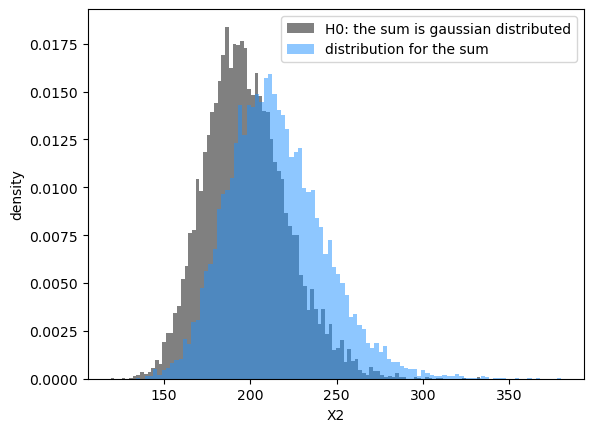

In [16]:
plt.clf()
plt.hist(x2_for_null, bins=100, density=True, color="gray", label="H0: the sum is gaussian distributed")
plt.hist(x2_for_sum, bins=100, density=True, label="distribution for the sum", alpha=0.5, color="dodgerblue")
plt.xlabel("X2")
plt.ylabel("density")
plt.legend()
print("also here there is some power to distinguish, but it is hard to compare to the previous graph for a KS test")
plt.show()

#### lets convert the X2 result into p-values
the distribution for a gaussian is our H0-- we'll estimate the p-values just by the quantiles of this. 


In [17]:
#This is a method to compute what percentile a certain X2 corresponds to in H0:
1-0.01*sps.percentileofscore(x2_for_null,200) #scale it to be 0-1 instead of 0-100 and make it so that larger X2=smaller p-values

0.42810000000000004

In [18]:
#this function is nicely vectorised: 
pvalues_x2 = 1-0.01*sps.percentileofscore(x2_for_null,  x2_for_sum)

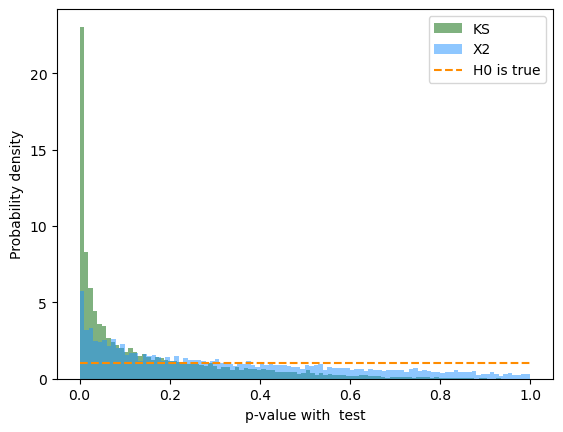

For the working point I chose, it turns out that KS is a bit better!


In [19]:
plt.clf()
plt.hist(pvalues_ks, bins=100, color="darkgreen", density=True , alpha=0.5, label="KS")
plt.hist(pvalues_x2, bins=100, color="dodgerblue", density=True, alpha=0.5, label="X2")
plt.plot([0,1],[1,1], linestyle="--", color="darkorange", label="H0 is true")
plt.xlabel("p-value with  test")
plt.ylabel("Probability density")
plt.legend()
plt.show()
print("For the working point I chose, it turns out that KS is a bit better!")

#### I recommend using the cumulative-- it lets you read off the power directly

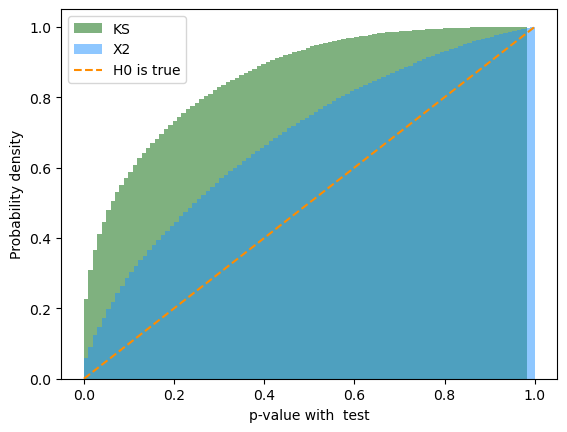

For the working point I chose, it turns out that KS performs a bit better
the power of the KS test for a 0.1-size test is 0.57
the power of the X2 test for a 0.1-size test is 0.29


In [20]:
plt.clf()
plt.hist(pvalues_ks, bins=100, color="darkgreen", density=True , cumulative=True, alpha=0.5, label="KS")
plt.hist(pvalues_x2, bins=100, color="dodgerblue", density=True, cumulative=True, alpha=0.5, label="X2")
plt.plot([0,1],[0,1], linestyle="--", color="darkorange", label="H0 is true")
plt.xlabel("p-value with  test")
plt.ylabel("Probability density")
plt.legend()
plt.show()
print("For the working point I chose, it turns out that KS performs a bit better")
print("the power of the KS test for a 0.1-size test is {:.2f}".format(np.mean(pvalues_ks<0.1)))
print("the power of the X2 test for a 0.1-size test is {:.2f}".format(np.mean(pvalues_x2<0.1)))

#### 

### Power investigation!
Try plotting the _power_ to reject the hypothesis that M sums of N random numbers each is a Gaussian distribution at some significance level alpha. 

I will try n_summand between 1 and 20

In [ ]:
n_summandss = np.array([1,2,3,4,5,7,10,15,20,30,50])
#n_summandss = np.array([1,3,20])
powers_ks = np.zeros(len(n_summandss))
powers_x2 = np.zeros(len(n_summandss))
size=0.1
pvalues_arrays = []

n_samples = 1000 #number of these sums that will make up a datase to be tested for gaussianity
n_toy_samples = 10000 #number of times we'll run the experiment
distribution = sps.expon() #exponential distribution-- it is very asymmetrical
distribution_null = sps.norm()

toydata_null = distribution_null.rvs((n_toy_samples, n_samples))
x2_for_null = np.zeros(n_toy_samples)

for i in range(n_toy_samples):
    x2_for_null[i] = sample_x2(toydata_null[i])

for i,n_summands in enumerate(n_summandss):
    print("power calculation  {:d} of {:d}".format(i, len(n_summandss)))
    #I do some clever generation so I can access each dataset in turn
    toydata = distribution.rvs((n_summands,n_toy_samples, n_samples)) #scipy.stats conveniently allows me to generate all the numbers in one go
    toydata = toydata.sum(axis=0) #sum n_summands
    
    toydata = toydata.astype(float) #python complains if we subtract floats from ints
    toydata -= n_summands * distribution.mean() #subtract the mean
    toydata /= np.sqrt(n_summands * distribution.var()) #and divide away the variance. 

    pvalues_ks = np.zeros(n_toy_samples)
    x2_for_sum = np.zeros(n_toy_samples)
    for j in range(n_toy_samples):
        pvalues_ks[j] = sps.kstest(toydata[j], "norm").pvalue
        x2_for_sum[j] = sample_x2(toydata[j]) #no need to recompute the X2 distribution for
        #each n_summands-- it is just the same gaussian in all cases
    
    pvalues_x2  = 1-0.01*sps.percentileofscore(x2_for_null, x2_for_sum)

        
    pvalues_arrays.append(pvalues_ks)
    powers_ks[i] = np.mean(pvalues_ks<size)
    powers_x2[i] = np.mean(pvalues_x2<size)

power calculation  0 of 11
power calculation  1 of 11
power calculation  2 of 11
power calculation  3 of 11
power calculation  4 of 11
power calculation  5 of 11
power calculation  6 of 11
power calculation  7 of 11
power calculation  8 of 11
power calculation  9 of 11


In [ ]:
plt.clf()
plt.scatter(n_summandss, powers_ks, label="KS test", color="darkgreen", marker="x")
plt.scatter(n_summandss, powers_x2, label="X2 test", color="dodgerblue", marker="+")
plt.xlabel("Number of summands in sum")
plt.ylabel("Power to exclude the gaussian hypothsis")
plt.plot([0,n_summandss[-1]+1], [size, size], color="darkred", linestyle="--", label= "no power")
plt.ylim(0,1.05)
plt.xlim(0,n_summandss[-1]+1)
plt.xticks(n_summandss)
plt.legend(loc="upper right")
plt.show()

### Already done?
If you have time-- consider if you have histogram in some measurement dimension (decide on a nice background distribution yourself)  with some unknown background that occurs in half of the bins. 
Can you compare the power of discovering this mismodelling if you know and if you do not know which bins are affected by this mismodelling?